# Bank Marketing

# Problem Statement
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

# Data Definition
age:       age of the customer (int)

job:       type of job (string)

education: education level (string)

default:   has credit in default or not (string)

balance:   average yearly balance (int)

housing:   has housing loan or not (string)

loan:      has personal loan or not (string)

contact:   contact communication type (string)

day:       last contact day of the week (int)

month:     last contact month of the year (int)

duration:  last contact duration in seconds (int)

campaign:  number of contacts performed during this campaign and for this client (int)

pdays:     number of days that passed by after the client was last contacted from a previous campaign (int)

previous:  number of contacts performed before this campaign and for this client (int)

poutcome:  outcome of the previous marketing campaign (string)

y:         has the client subscribed a term deposit? (string,Target)


# 1. Importing Libraries

In [96]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings ('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# 2. Read data

In [3]:
df=pd.read_csv(r"C:\Users\Bhanu\Desktop\Capstone\bank customers details.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1,0,unknown,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
#check for duplicate records
if df.duplicated().sum()==0:
    print('No duplicate records present')
else:
    print(f'{df.duplicated().sum()} number of duplicate records are found')

No duplicate records present


In [6]:
df_OG=df.copy() #having a copy of the original dataframe

# 3. Understanding the Data

In [7]:
#number of rows and columns
df.shape

(45211, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45063 non-null  float64
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45159 non-null  float64
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  y          45211 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 5.9+ MB


In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45063.000000,45211.000000,45159.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1363.701773,15.806419,258.178414,2.763841,40.197828,0.580323
std,10.618762,3047.420845,8.322476,257.583262,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1430.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
#checking for missing values
missing_values=df.isnull().sum()
missing_values[missing_values>0]

balance     148
duration     52
dtype: int64

In [11]:
#there are two attributes with missing values in them

In [12]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('No. of unique values= ',df[i].nunique(),'\n')

age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
No. of unique values=  77 

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
No. of unique values=  12 

marital
['married' 'single' 'divorced']
No. of unique values=  3 

education
['tertiary' 'secondary' 'unknown' 'primary']
No. of unique values=  4 

default
['no' 'yes']
No. of unique values=  2 

balance
[2.1430e+03 2.9000e+01 2.0000e+00 ... 8.2050e+03 1.4204e+04 1.6353e+04]
No. of unique values=  7161 

housing
['yes' 'no']
No. of unique values=  2 

loan
['no' 'yes' 'NO' 'No']
No. of unique values=  4 

contact
['unknown' '?' 'cellular' 'telephone']
No. of unique values=  4 

day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  

## Cleaning the data

It is seen that loan attribute should contain either yes or a no. But "no" is present in different forms. If retained in the 
 same way, the machine will treat "no" as 3 different variables. Hence it is required to bring them in 1 form

In [13]:
df['loan']=df['loan'].str.replace('NO','no')

In [14]:
df['loan']=df['loan'].str.replace('No','no')

In [15]:
df['loan']=df['loan'].str.replace('noo','no')

In [16]:
print('Loan column before treatment')
for i in df_OG.columns:
    if i=='loan':
        print(i)
        print(df_OG[i].unique())
        print('No. of unique values= ',df_OG[i].nunique(),'\n')
print('Loan column after treatment')
for i in df.columns:
    if i=='loan':
        print(i)
        print(df[i].unique())
        print('No. of unique values= ',df[i].nunique(),'\n')

Loan column before treatment
loan
['no' 'yes' 'NO' 'No']
No. of unique values=  4 

Loan column after treatment
loan
['no' 'yes']
No. of unique values=  2 



In [17]:
#loan column is cleaned

We see that contact column has '?' in it. It needs to be replaced with a suitable value from its table.
For that we will convert '?' with NaN

In [18]:
df['contact']=df.contact.replace('?',np.nan)

In [19]:
df['contact'].unique()

array(['unknown', nan, 'cellular', 'telephone'], dtype=object)

In [20]:
df['contact'].mode()

0    cellular
Name: contact, dtype: object

In [21]:
df['contact'].isnull().sum()

75

In [22]:
df['contact']=df['contact'].replace(np.nan,'cellular')

In [23]:
print('contact column before treatment')
for i in df_OG.columns:
    if i=='contact':
        print(i)
        print(df_OG[i].unique())
        print('No. of unique values= ',df_OG[i].nunique(),'\n')
print('contact column after treatment')
for i in df.columns:
    if i=='contact':
        print(i)
        print(df[i].unique())
        print('No. of unique values= ',df[i].nunique(),'\n')

contact column before treatment
contact
['unknown' '?' 'cellular' 'telephone']
No. of unique values=  4 

contact column after treatment
contact
['unknown' 'cellular' 'telephone']
No. of unique values=  3 



In [24]:
#contact column is cleaned

In [25]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('No. of unique values= ',df[i].nunique(),'\n')

age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
No. of unique values=  77 

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
No. of unique values=  12 

marital
['married' 'single' 'divorced']
No. of unique values=  3 

education
['tertiary' 'secondary' 'unknown' 'primary']
No. of unique values=  4 

default
['no' 'yes']
No. of unique values=  2 

balance
[2.1430e+03 2.9000e+01 2.0000e+00 ... 8.2050e+03 1.4204e+04 1.6353e+04]
No. of unique values=  7161 

housing
['yes' 'no']
No. of unique values=  2 

loan
['no' 'yes']
No. of unique values=  2 

contact
['unknown' 'cellular' 'telephone']
No. of unique values=  3 

day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18

In [26]:
missing_values[missing_values>0]

balance     148
duration     52
dtype: int64

<Axes: xlabel='balance', ylabel='Density'>

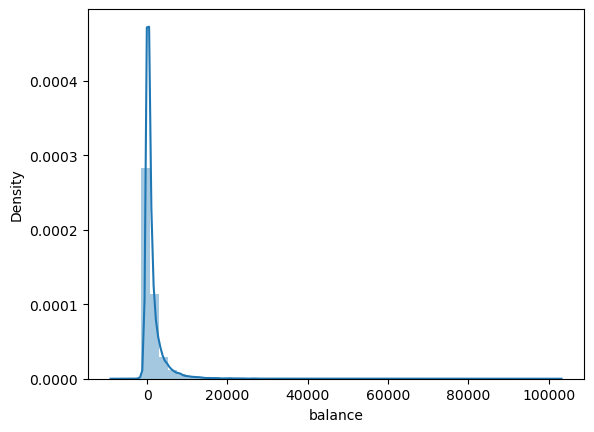

In [27]:
sns.distplot(df.balance)

<Axes: xlabel='duration', ylabel='Density'>

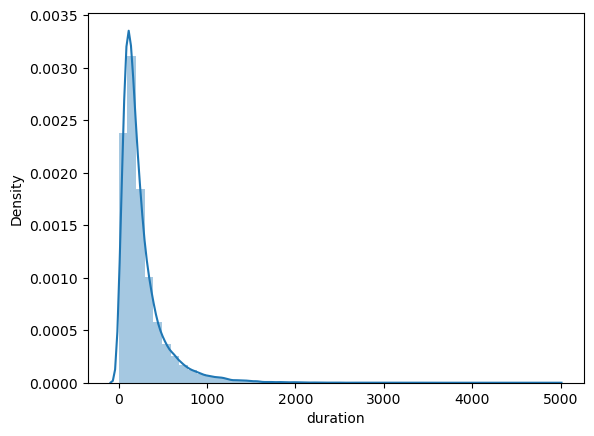

In [28]:
sns.distplot(df.duration)

In [29]:
df['balance']=df['balance'].fillna(df.balance.mean())

In [30]:
missing_values=df.isnull().sum()
missing_values[missing_values>0]

duration    52
dtype: int64

In [31]:
df['duration']=df['duration'].fillna(df.balance.mean())

In [32]:
df['duration_mins']=df['duration']/60

In [33]:
df.balance.unique()

array([2.1430e+03, 2.9000e+01, 2.0000e+00, ..., 8.2050e+03, 1.4204e+04,
       1.6353e+04])

In [34]:
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [35]:
month_name_to_number={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}

In [36]:
df['month_number']=df['month'].map(month_name_to_number)

In [37]:
df=df.sort_values(by='month_number')

# 4. Data Visualisation

In [38]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'duration_mins', 'month_number'],
      dtype='object')

<Axes: xlabel='y', ylabel='count'>

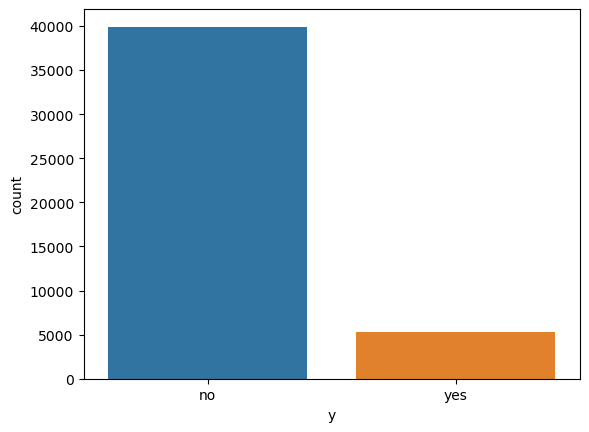

In [39]:
sns.countplot(data=df,x=df.y)

Most of the people do not subscribe to the term deposit

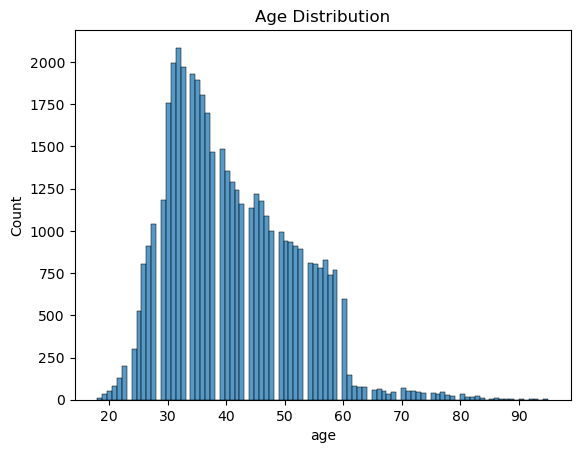

In [40]:
sns.histplot(df['age'])
plt.title('Age Distribution')
plt.show()

Most the the customers are middle aged between 30-40 years

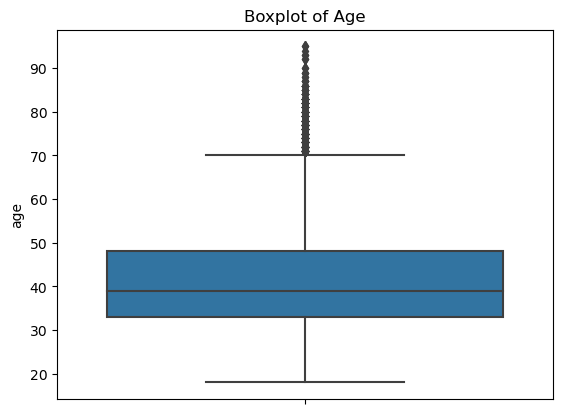

In [41]:
sns.boxplot(y=df['age'])
plt.title('Boxplot of Age')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'blue-collar'),
  Text(1, 0, 'management'),
  Text(2, 0, 'technician'),
  Text(3, 0, 'admin.'),
  Text(4, 0, 'services'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'self-employed'),
  Text(7, 0, 'entrepreneur'),
  Text(8, 0, 'unemployed'),
  Text(9, 0, 'housemaid'),
  Text(10, 0, 'student'),
  Text(11, 0, 'unknown')])

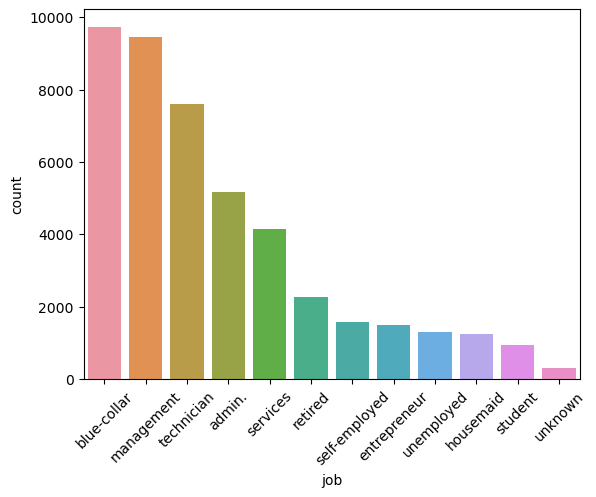

In [42]:
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.xticks(rotation=45)

Most of the bank customers are blue-collar workers, next being management profiles and then technician

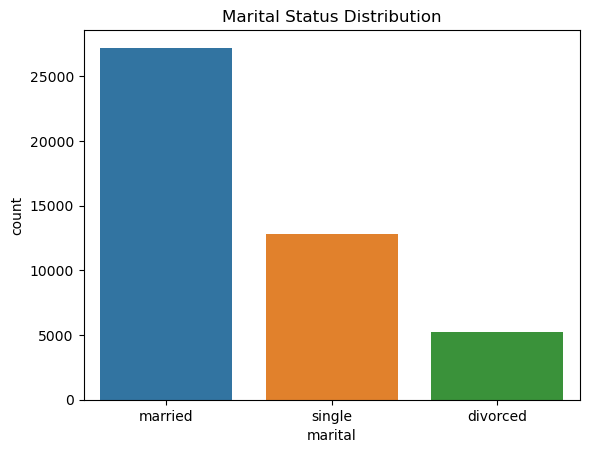

In [43]:
sns.countplot(data=df, x='marital')
plt.title('Marital Status Distribution')
plt.show()

Most customers are married

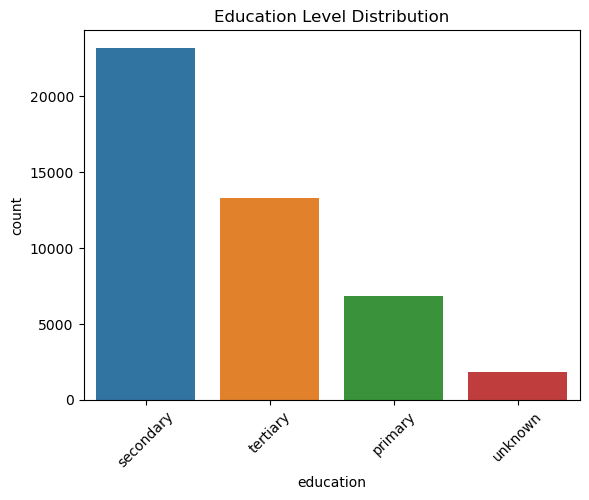

In [44]:
sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
plt.title('Education Level Distribution')
plt.xticks(rotation=45)
plt.show()

Most of them have secondary education, with a very few having unknown education. Maybe they don't have an educational background

In [45]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'duration_mins', 'month_number'],
      dtype='object')

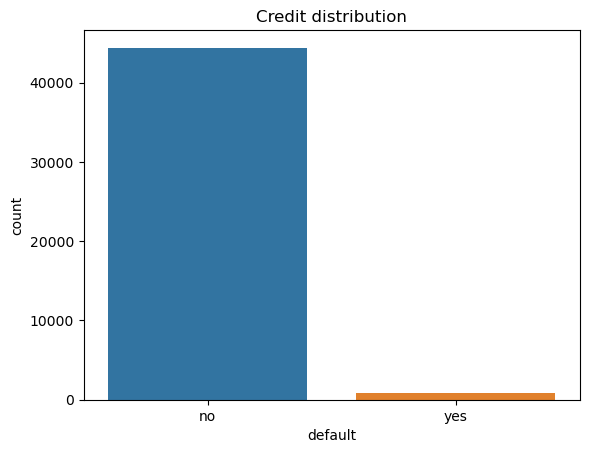

In [46]:
sns.countplot(data=df, x='default')
plt.title('Credit distribution')
plt.show()

Most of the people do not borrow the funds from the bank

<Axes: >

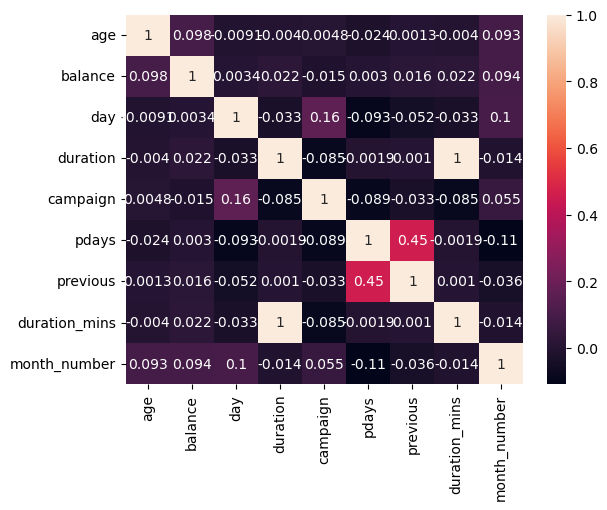

In [47]:
sns.heatmap(df[list(df.describe().columns)].corr(),annot=True)

In [48]:
df.groupby('day')['duration_mins'].mean().values

array([4.68602484, 4.1439933 , 4.56506024, 4.38115806, 4.55055418,
       4.45805743, 4.57808579, 4.27528779, 4.207885  , 4.77102417,
       4.263286  , 4.46870451, 4.61991385, 4.46349301, 4.57146213,
       4.94062426, 4.59461062, 4.0522747 , 4.37582053, 3.94173881,
       4.34933121, 4.4207919 , 4.54811857, 4.73216636, 4.18406746,
       3.95508857, 3.78580137, 3.76191257, 4.03551098, 4.64837277,
       3.01715915])

In [49]:
len(df.day)

45211

In [50]:
len(df.groupby('day')['duration_mins'].mean().values)

31

([<matplotlib.axis.XTick at 0x25a8af413d0>,
 [Text(1, 0, '1'),
  Text(8, 0, '8'),
  Text(15, 0, '15'),
  Text(22, 0, '22'),
  Text(29, 0, '29')])

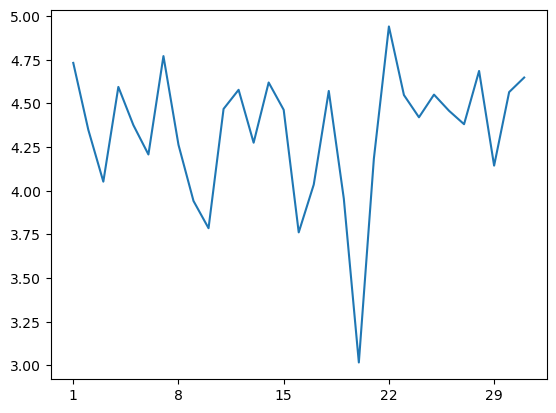

In [51]:
sns.lineplot(x=df.day.unique(),y=df.groupby('day')['duration_mins'].mean().values)
plt.xticks(range(1,32,7))

A higer call duration(average) is found during the month end, it is around 5 minutes. This means that people are in the need of money towards the month end

([<matplotlib.axis.XTick at 0x25a8af77490>,
 [Text(1, 0, 'feb'),
  Text(2, 0, 'mar'),
  Text(3, 0, 'apr'),
  Text(4, 0, 'may'),
  Text(5, 0, 'jun'),
  Text(6, 0, 'jul'),
  Text(7, 0, 'aug'),
  Text(8, 0, 'sep'),
  Text(9, 0, 'oct'),
  Text(10, 0, 'nov'),
  Text(11, 0, 'dec'),
  Text(12, 0, '')])

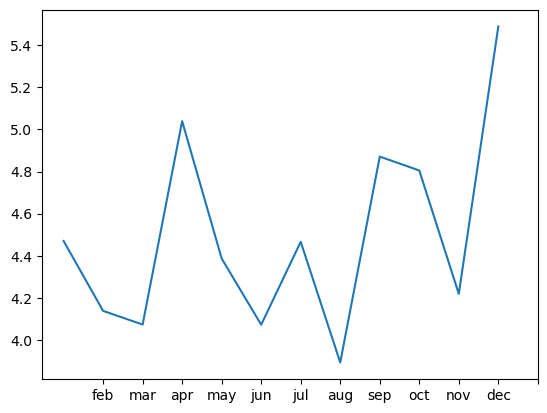

In [52]:
sns.lineplot(x=df.month.unique(),y=df.groupby('month_number')['duration_mins'].mean().values)
plt.xticks(range(1,13))

The call duration is quite high from April. The reason maybe that it is the beginning of the new financial year, just after March.
The call duration is at its peak towards the year end for upto 5 1/2 minutes

<Axes: xlabel='age', ylabel='balance'>

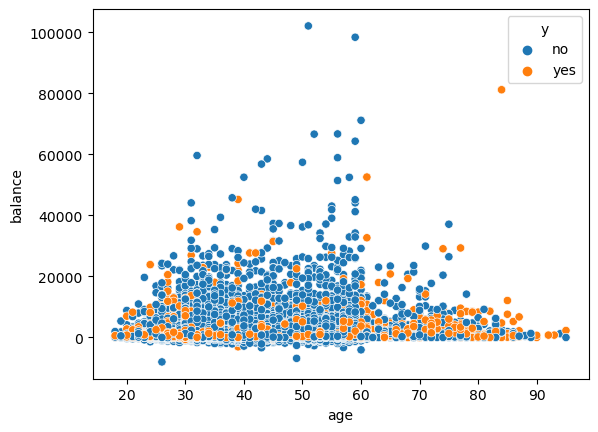

In [53]:
sns.scatterplot(data=df,x=df.age,y=df.balance,hue=df.y)

It is seen from the scatter plot that majority of the people belonging to all the age group's balance is between 0 to 30,000.
Among them, most of the people who subscribe to the term deposit's balance is around 10,000. This shows that the people only who are in need of money subscribe to the tern deposits.

In [54]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'duration_mins', 'month_number'],
      dtype='object')

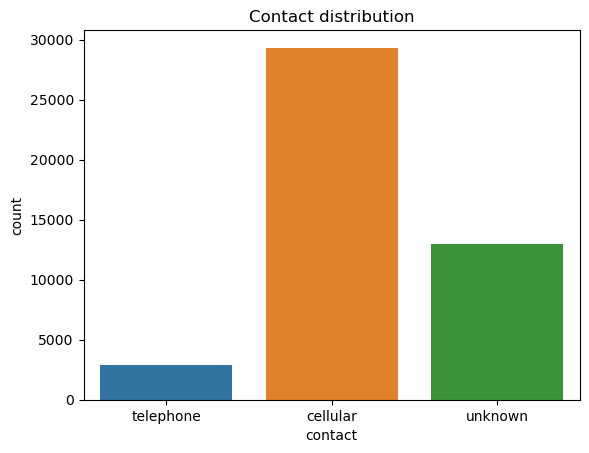

In [55]:
sns.countplot(data=df, x='contact')
plt.title('Contact distribution')
plt.show()

Cellular is the most popular type of contact

<Axes: xlabel='age', ylabel='campaign'>

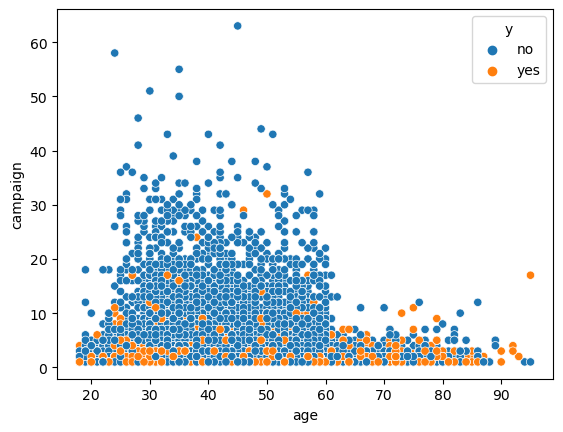

In [56]:
sns.scatterplot(data=df,x=df.age,y=df.campaign,hue=df.y)

The plot shows that if the campaign is too high druing this campaign, that is more than 5 times, the customer might not be interested in subscribing to the term deposit at all. 
Thus the number of contact must be optimum with effectiveness in order to attract the customers.

<Axes: xlabel='age', ylabel='previous'>

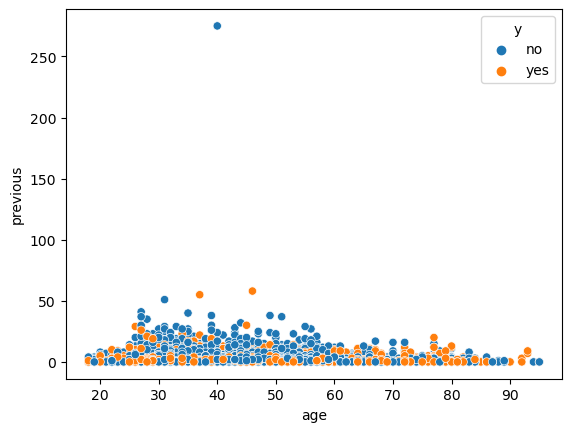

In [57]:
sns.scatterplot(data=df,x=df.age,y=df.previous,hue=df.y)

Same story applies to the nummber of previous contacts made before this campaign

<Axes: xlabel='campaign', ylabel='duration_mins'>

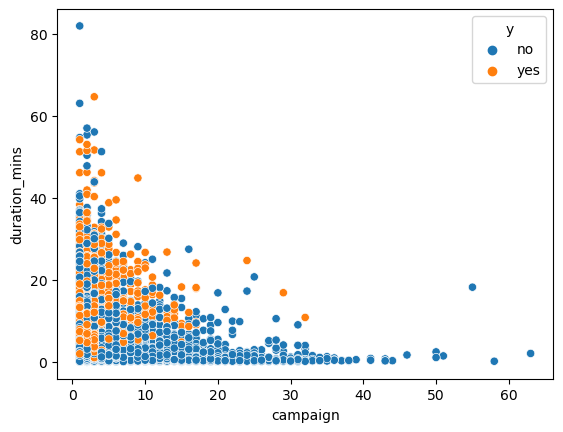

In [58]:
sns.scatterplot(data=df,x=df.campaign,y=df.duration_mins,hue=df.y)

<Axes: xlabel='previous', ylabel='duration_mins'>

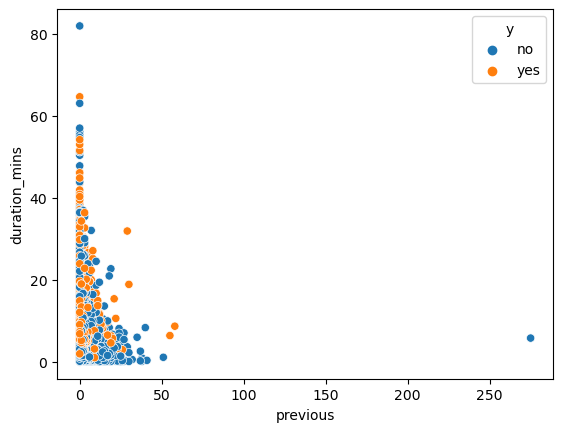

In [59]:
sns.scatterplot(data=df,x=df.previous,y=df.duration_mins,hue=df.y)

<Axes: xlabel='poutcome', ylabel='count'>

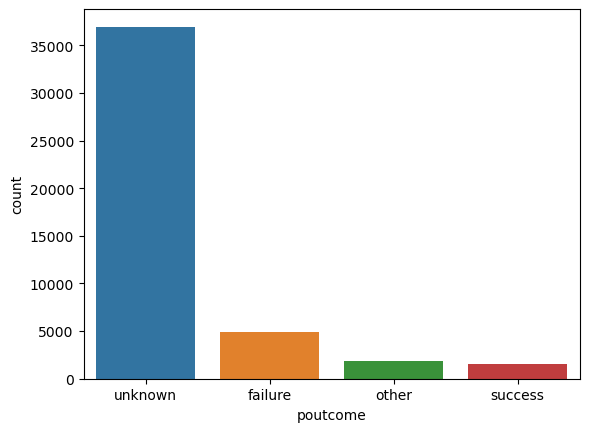

In [60]:
sns.countplot(data=df,x='poutcome')

Most of the people tend not to tell their decisions regarding the campaigns held

# 5. Encoding

In [61]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duration_mins,month_number
27859,45,housemaid,married,primary,no,1526.0,yes,no,telephone,28,jan,109.0,1,-1,0,unknown,no,1.816667,1
28326,56,management,single,tertiary,no,545.0,yes,no,cellular,29,jan,86.0,1,-1,0,unknown,no,1.433333,1
28325,37,technician,married,tertiary,no,183.0,yes,no,cellular,29,jan,51.0,1,258,1,failure,no,0.850000,1
28324,34,admin.,single,secondary,no,391.0,yes,no,cellular,29,jan,77.0,1,265,2,failure,no,1.283333,1
28323,35,blue-collar,married,secondary,no,645.0,yes,no,cellular,29,jan,114.0,1,-1,0,unknown,no,1.900000,1


In [62]:
cat_features=df.dtypes[df.dtypes=='object'].index
cat_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [63]:
cat_col=df[cat_features]
cat_col.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
27859,housemaid,married,primary,no,yes,no,telephone,jan,unknown,no
28326,management,single,tertiary,no,yes,no,cellular,jan,unknown,no
28325,technician,married,tertiary,no,yes,no,cellular,jan,failure,no
28324,admin.,single,secondary,no,yes,no,cellular,jan,failure,no
28323,blue-collar,married,secondary,no,yes,no,cellular,jan,unknown,no


In [64]:
cat_col.shape

(45211, 10)

In [65]:
def cols_encoder(cat_col,columns):
    le=LabelEncoder()
    for column in columns:
        cat_col[column+'encoded']=le.fit_transform(cat_col[column])
    return cat_col

In [66]:
cols_encoder(cat_col,cat_features)

,job,marital,education,default,housing,loan,contact,month,poutcome,y,jobencoded,maritalencoded,educationencoded,defaultencoded,housingencoded,loanencoded,contactencoded,monthencoded,poutcomeencoded,yencoded
27859,housemaid,married,primary,no,yes,no,telephone,jan,unknown,no,3,1,0,0,1,0,1,4,3,0
28326,management,single,tertiary,no,yes,no,cellular,jan,unknown,no,4,2,2,0,1,0,0,4,3,0
28325,technician,married,tertiary,no,yes,no,cellular,jan,failure,no,9,1,2,0,1,0,0,4,0,0
28324,admin.,single,secondary,no,yes,no,cellular,jan,failure,no,0,2,1,0,1,0,0,4,0,0
28323,blue-collar,married,secondary,no,yes,no,cellular,jan,unknown,no,1,1,1,0,1,0,0,4,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42500,technician,married,tertiary,no,no,no,cellular,dec,other,no,9,1,2,0,0,0,0,2,1,0
42499,management,single,tertiary,no,no,no,cellular,dec,success,yes,4,2,2,0,0,0,0,2,2,1
42498,services,single,tertiary,no,no,no,cellular,dec,success,no,7,2,2,0,0,0,0,2,2,0
42511,blue-collar,single,secondary,no,no,no,cellular,dec,unknown,yes,1,2,1,0,0,0,0,2,3,1


In [67]:
cat_col=cat_col.drop(cat_features,axis=1)

In [68]:
cat_col

,jobencoded,maritalencoded,educationencoded,defaultencoded,housingencoded,loanencoded,contactencoded,monthencoded,poutcomeencoded,yencoded
27859,3,1,0,0,1,0,1,4,3,0
28326,4,2,2,0,1,0,0,4,3,0
28325,9,1,2,0,1,0,0,4,0,0
28324,0,2,1,0,1,0,0,4,0,0
28323,1,1,1,0,1,0,0,4,3,0
...,...,...,...,...,...,...,...,...,...,...
42500,9,1,2,0,0,0,0,2,1,0
42499,4,2,2,0,0,0,0,2,2,1
42498,7,2,2,0,0,0,0,2,2,0
42511,1,2,1,0,0,0,0,2,3,1


In [69]:
cat_col=cat_col.drop('yencoded',axis=1)

In [70]:
cat_col.reset_index()

,index,jobencoded,maritalencoded,educationencoded,defaultencoded,housingencoded,loanencoded,contactencoded,monthencoded,poutcomeencoded
0,27859,3,1,0,0,1,0,1,4,3
1,28326,4,2,2,0,1,0,0,4,3
2,28325,9,1,2,0,1,0,0,4,0
3,28324,0,2,1,0,1,0,0,4,0
4,28323,1,1,1,0,1,0,0,4,3
...,...,...,...,...,...,...,...,...,...,...
45206,42500,9,1,2,0,0,0,0,2,1
45207,42499,4,2,2,0,0,0,0,2,2
45208,42498,7,2,2,0,0,0,0,2,2
45209,42511,1,2,1,0,0,0,0,2,3


# 6. Scaling

In [71]:
num_featues=df.dtypes[df.dtypes!='object'].index

In [72]:
num_featues

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'duration_mins', 'month_number'],
      dtype='object')

In [73]:
num_col=df[num_featues]

In [74]:
num_col.reset_index()

,index,age,balance,day,duration,campaign,pdays,previous,duration_mins,month_number
0,27859,45,1526.0,28,109.0,1,-1,0,1.816667,1
1,28326,56,545.0,29,86.0,1,-1,0,1.433333,1
2,28325,37,183.0,29,51.0,1,258,1,0.850000,1
3,28324,34,391.0,29,77.0,1,265,2,1.283333,1
4,28323,35,645.0,29,114.0,1,-1,0,1.900000,1
...,...,...,...,...,...,...,...,...,...,...
45206,42500,45,115.0,16,147.0,1,194,1,2.450000,12
45207,42499,29,572.0,16,314.0,1,195,1,5.233333,12
45208,42498,26,12.0,15,72.0,4,186,6,1.200000,12
45209,42511,28,1705.0,17,412.0,2,-1,0,6.866667,12


In [75]:
num_col

,age,balance,day,duration,campaign,pdays,previous,duration_mins,month_number
27859,45,1526.0,28,109.0,1,-1,0,1.816667,1
28326,56,545.0,29,86.0,1,-1,0,1.433333,1
28325,37,183.0,29,51.0,1,258,1,0.850000,1
28324,34,391.0,29,77.0,1,265,2,1.283333,1
28323,35,645.0,29,114.0,1,-1,0,1.900000,1
...,...,...,...,...,...,...,...,...,...
42500,45,115.0,16,147.0,1,194,1,2.450000,12
42499,29,572.0,16,314.0,1,195,1,5.233333,12
42498,26,12.0,15,72.0,4,186,6,1.200000,12
42511,28,1705.0,17,412.0,2,-1,0,6.866667,12


In [76]:
merge=pd.concat([cat_col,num_col],axis=1)

In [77]:
merge.isnull().sum()

jobencoded          0
maritalencoded      0
educationencoded    0
defaultencoded      0
housingencoded      0
loanencoded         0
contactencoded      0
monthencoded        0
poutcomeencoded     0
age                 0
balance             0
day                 0
duration            0
campaign            0
pdays               0
previous            0
duration_mins       0
month_number        0
dtype: int64

In [78]:
merge.head()

,jobencoded,maritalencoded,educationencoded,defaultencoded,housingencoded,loanencoded,contactencoded,monthencoded,poutcomeencoded,age,balance,day,duration,campaign,pdays,previous,duration_mins,month_number
27859,3,1,0,0,1,0,1,4,3,45,1526.0,28,109.0,1,-1,0,1.816667,1
28326,4,2,2,0,1,0,0,4,3,56,545.0,29,86.0,1,-1,0,1.433333,1
28325,9,1,2,0,1,0,0,4,0,37,183.0,29,51.0,1,258,1,0.850000,1
28324,0,2,1,0,1,0,0,4,0,34,391.0,29,77.0,1,265,2,1.283333,1
28323,1,1,1,0,1,0,0,4,3,35,645.0,29,114.0,1,-1,0,1.900000,1


In [79]:
scaler=RobustScaler()
scaled_data=scaler.fit_transform(merge)

In [80]:
scaled_df=pd.DataFrame(scaled_data,columns=merge.columns)

In [81]:
scaled_df.head()

,jobencoded,maritalencoded,educationencoded,defaultencoded,housingencoded,loanencoded,contactencoded,monthencoded,poutcomeencoded,age,balance,day,duration,campaign,pdays,previous,duration_mins,month_number
0,-0.166667,0.0,-1.0,0.0,0.0,0.0,0.5,-0.4,0.0,0.400000,0.794815,0.923077,-0.328704,-0.5,0.0,0.0,-0.328704,-1.666667
1,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,-0.4,0.0,1.133333,0.068148,1.000000,-0.435185,-0.5,0.0,0.0,-0.435185,-1.666667
2,0.833333,0.0,1.0,0.0,0.0,0.0,0.0,-0.4,-3.0,-0.133333,-0.200000,1.000000,-0.597222,-0.5,259.0,1.0,-0.597222,-1.666667
3,-0.666667,1.0,0.0,0.0,0.0,0.0,0.0,-0.4,-3.0,-0.333333,-0.045926,1.000000,-0.476852,-0.5,266.0,2.0,-0.476852,-1.666667
4,-0.500000,0.0,0.0,0.0,0.0,0.0,0.0,-0.4,0.0,-0.266667,0.142222,1.000000,-0.305556,-0.5,0.0,0.0,-0.305556,-1.666667


# 7. Train Test split

In [82]:
X=scaled_df

In [83]:
X.head()

,jobencoded,maritalencoded,educationencoded,defaultencoded,housingencoded,loanencoded,contactencoded,monthencoded,poutcomeencoded,age,balance,day,duration,campaign,pdays,previous,duration_mins,month_number
0,-0.166667,0.0,-1.0,0.0,0.0,0.0,0.5,-0.4,0.0,0.400000,0.794815,0.923077,-0.328704,-0.5,0.0,0.0,-0.328704,-1.666667
1,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,-0.4,0.0,1.133333,0.068148,1.000000,-0.435185,-0.5,0.0,0.0,-0.435185,-1.666667
2,0.833333,0.0,1.0,0.0,0.0,0.0,0.0,-0.4,-3.0,-0.133333,-0.200000,1.000000,-0.597222,-0.5,259.0,1.0,-0.597222,-1.666667
3,-0.666667,1.0,0.0,0.0,0.0,0.0,0.0,-0.4,-3.0,-0.333333,-0.045926,1.000000,-0.476852,-0.5,266.0,2.0,-0.476852,-1.666667
4,-0.500000,0.0,0.0,0.0,0.0,0.0,0.0,-0.4,0.0,-0.266667,0.142222,1.000000,-0.305556,-0.5,0.0,0.0,-0.305556,-1.666667


In [84]:
y=df['y']

In [85]:
y

27859     no
28326     no
28325     no
28324     no
28323     no
        ... 
42500     no
42499    yes
42498     no
42511    yes
27727    yes
Name: y, Length: 45211, dtype: object

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [102]:
print(f'X_train shape = {y_test.shape}')

X_train shape = (9043,)


# 8. Model Building

In [103]:
algos=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier()]
names=['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier']
rmse_list=[]
r2_s=[]
r2_t=[]


In [104]:
for name in algos:
    model=name
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    y_pred=model.predict(X_test)
    confusion_matrix(y_test,y_pred)
    print('Confusion Matrix for Test Data\n',confusion_matrix(y_test,y_pred))
    print(name,"Classification Report")
    print(classification_report(y_test,y_pred))

Confusion Matrix for Test Data
 [[7782  150]
 [ 908  203]]
LogisticRegression() Classification Report
              precision    recall  f1-score   support

          no       0.90      0.98      0.94      7932
         yes       0.58      0.18      0.28      1111

    accuracy                           0.88      9043
   macro avg       0.74      0.58      0.61      9043
weighted avg       0.86      0.88      0.86      9043

Confusion Matrix for Test Data
 [[7352  580]
 [ 576  535]]
DecisionTreeClassifier() Classification Report
              precision    recall  f1-score   support

          no       0.93      0.93      0.93      7932
         yes       0.48      0.48      0.48      1111

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043

Confusion Matrix for Test Data
 [[7675  257]
 [ 629  482]]
RandomForestClassifier() Classification Report
              precision    recal

# 9. Fine tuning

In [105]:
param_dist = {
    'n_estimators': [100,200,300,400,500,600],
    'max_depth': [10,20,30,40,50,60],
    'min_samples_split': [2,5,10,20,30],
    'min_samples_leaf': [1,2,4,6,8,10],
    'max_features': ['sqrt', 'log2']}

# Create a Randomized Search Cross-Validation object
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_dist,  cv=5, scoring='accuracy', random_state=42)

# Fit the randomized search to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters from the randomized search
best_params = random_search.best_params_
print(best_params)

{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 40}


In [106]:
model2 = RandomForestClassifier(n_estimators = 500,min_samples_split =2, min_samples_leaf=2, max_features ='log2',max_depth =40)

In [107]:
model2.fit(X_train,y_train)
y_train_pred=model2.predict(X_train)
y_test_pred=model2.predict(X_test)

# 10. Final Model Evaluation

In [108]:
confusion_matrix(y_test,y_test_pred)
print(name,'classification report train')
print(classification_report(y_train,y_train_pred))

print(name,'classification report test')
print(classification_report(y_test,y_test_pred))

RandomForestClassifier() classification report train
              precision    recall  f1-score   support

          no       0.99      1.00      0.99     31990
         yes       1.00      0.89      0.94      4178

    accuracy                           0.99     36168
   macro avg       0.99      0.94      0.97     36168
weighted avg       0.99      0.99      0.99     36168

RandomForestClassifier() classification report test
              precision    recall  f1-score   support

          no       0.92      0.97      0.95      7932
         yes       0.65      0.43      0.52      1111

    accuracy                           0.90      9043
   macro avg       0.79      0.70      0.73      9043
weighted avg       0.89      0.90      0.89      9043

